#### Simulations were v2.4, used a tau of 1, max pop size fold change of 3, 5e3 generations, random initial driver mutation, CGC driver gene lists, heterozygous mutations 1/10th the effect of homozygous

In [30]:
library(naturalsort)
library(fields)
library(rasterImage)
library(pracma) # only needed for moving-average plot
library(viridis)
cols1 = magma(7)
cols2 = magma(100)

muv <- c(0.05,0.10,0.20,0.50,1.00,5.00)
N0v <- c(1e2,5e2,1e3,2e3)
sdv <- c(0.005,0.010,0.050,0.100,0.500,1.000)
spv <- c(0.005,0.010,0.050,0.100,0.500,1.000)

dataDir <- '~/jackgl/lung_1030/'
ctype <- 'Lung'

## Population size time series

In [13]:
flst <- naturalsort(list.files(dataDir))
flst <- flst[3:(length(flst))]

In [14]:
Ns <- array(NA,dim=c(4,6,6,6,5,2e4/4))

nn <- 1
for (ii in 1:4) {
    for (jj in 1:6) {
        for (kk in 1:6) {
            for (ll in 1:6) {
                for (mm in 1:5) {
                    load(paste0(dataDir,flst[nn]))
                    N[N==0] <- NA
                    Ns[ii,jj,kk,ll,mm,] <- N
#                     filenames[ii,jj,kk,ll,mm] <- flst[nn]
                    nn <- nn+1
                }
            }
        }
    }
}

In [15]:
Ns_repmean <- apply(Ns,c(1,2,3,4,6),mean)
Ns_repmed <- apply(Ns,c(1,2,3,4,6),median)
Ns_repstd <- apply(Ns,c(1,2,3,4,6),std)

In [16]:
nd_het <- array(NA,dim=c(4,6,6,6,5))
np_het <- array(NA,dim=c(4,6,6,6,5))
nd_hom <- array(NA,dim=c(4,6,6,6,5))
np_hom <- array(NA,dim=c(4,6,6,6,5))

nn <- 1
for (ii in 1:4) {
    for (jj in 1:6) {
        for (kk in 1:6) {
            for (ll in 1:6) {
                for (mm in 1:5) {
                    load(paste0(dataDir,flst[nn]))
                    nd_het[ii,jj,kk,ll,mm] <- sum(Pop$nd_het[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
                    np_het[ii,jj,kk,ll,mm] <- sum(Pop$np_het[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
                    nd_hom[ii,jj,kk,ll,mm] <- sum(Pop$nd_hom[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
                    np_hom[ii,jj,kk,ll,mm] <- sum(Pop$np_hom[Pop$ncells!=0]*Pop$ncells[Pop$ncells!=0]/sum(Pop$ncells))
                    nn <- nn+1
                }
            }
        }
    }
}

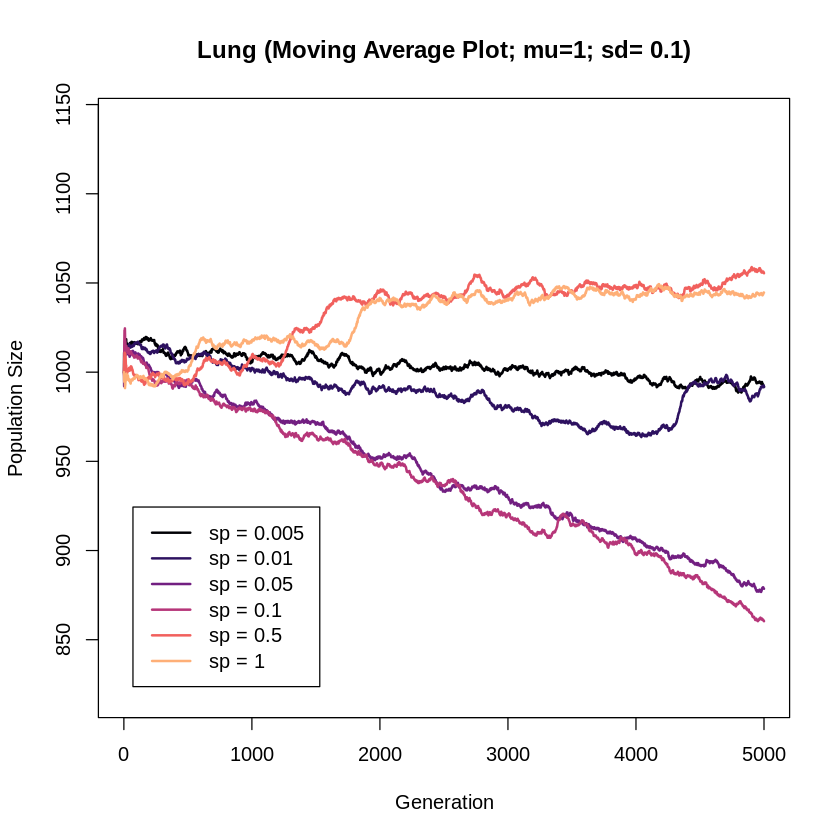

In [17]:
N0 <- 1000
mu <- 1
sd <- .1

tmp <- Ns_repmean[which(N0v==N0),which(muv==mu),which(sdv==sd),1:6,]
plot(1:length(tmp[1,]),movavg(tmp[1,],100,'s'),type='l',main=paste0(ctype,' (Moving Average Plot; mu=',toString(mu),';',' sd= ',toString(sd),')'),xlab='Generation',ylab='Population Size',ylim=c(min(tmp[!is.na(tmp)]),max(tmp[!is.na(tmp)])),col=cols1[1],lwd=2)
for (i in 2:6) {lines(1:length(tmp[i,]),movavg(tmp[i,],100,'s'),type='l',xlab='Generation',ylab='Population Size',col=cols1[i],lwd=2)}
legend('bottomleft',legend=c("sp = 0.005","sp = 0.01","sp = 0.05","sp = 0.1","sp = 0.5","sp = 1"),lty=1,lwd=2,col=head(cols1,n=6),inset=0.05)
options(repr.plot.width=7, repr.plot.height=7)

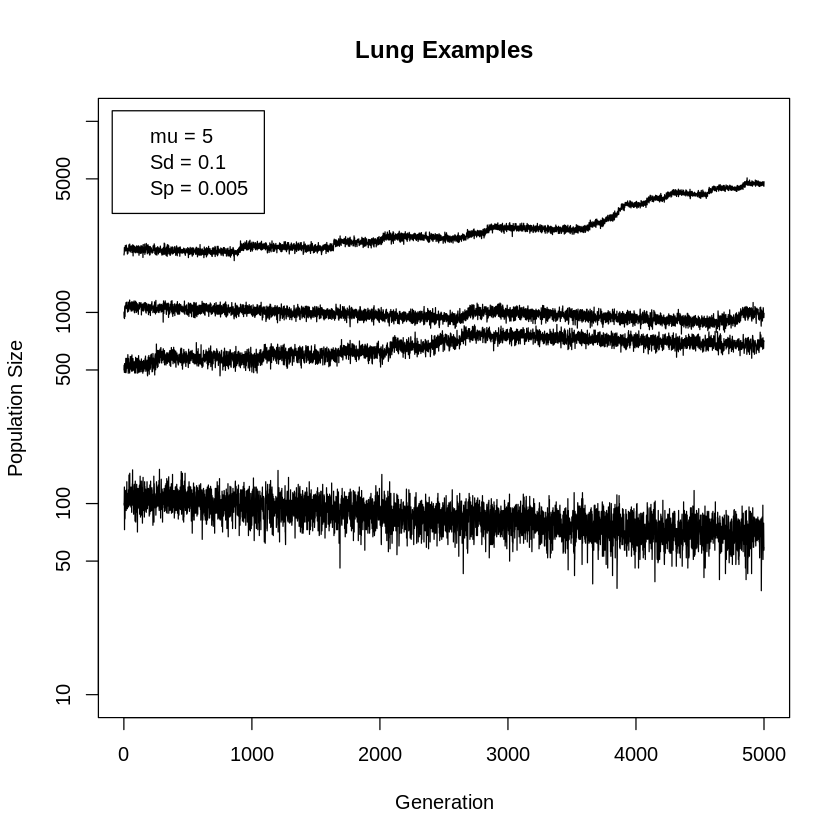

In [49]:
mu <- 5
sd <- .1
sp <- .005
# tmp <- Ns_repmean[,which(muv==mu),which(sdv==sd),which(spv==sp),]
tmp <- Ns[,which(muv==mu),which(sdv==sd),which(spv==sp),3,]
plot(1:length(tmp[1,]),tmp[1,],type='l',main=paste(ctype,'Examples'),xlab='Generation',ylab='Population Size',ylim=c(10,1e4),log='y')
for (i in 2:4) {lines(1:length(tmp[i,]),tmp[i,],type='l',xlab='Generation',ylab='Population Size')}
legend('topleft',legend=c(paste0("mu = ",toString(mu)),
                          paste0("Sd = ",toString(sd)),
                          paste0("Sp = ",toString(sp))),lty=0,inset=0.02)

## Heat maps

In [19]:
Ns_fc <- array(NA,dim=c(4,6,6,6,5))
for (ii in 1:4) {
    for (jj in 1:6) {
        for (kk in 1:6) {
            for (ll in 1:6) {
                for (mm in 1:5) {
                    tmpN <- Ns[ii,jj,kk,ll,mm,]
                    Ns_fc[ii,jj,kk,ll,mm] <- tmpN[length(which(!is.na(tmpN)))]/tmpN[1]
                }
            }
        }
    }
}
rm(tmpN)
Ns_fc_mean <- apply(Ns_fc,c(1,2,3,4),mean)
Ns_fc_med <- apply(Ns_fc,c(1,2,3,4),median)
Ns_fc_std <- apply(Ns_fc,c(1,2,3,4),std)

dim(Ns_fc)

[1] 4 6 6 6 5

In [50]:
Ns_fc_max <- apply(Ns_fc,c(1,2,3,4),max)

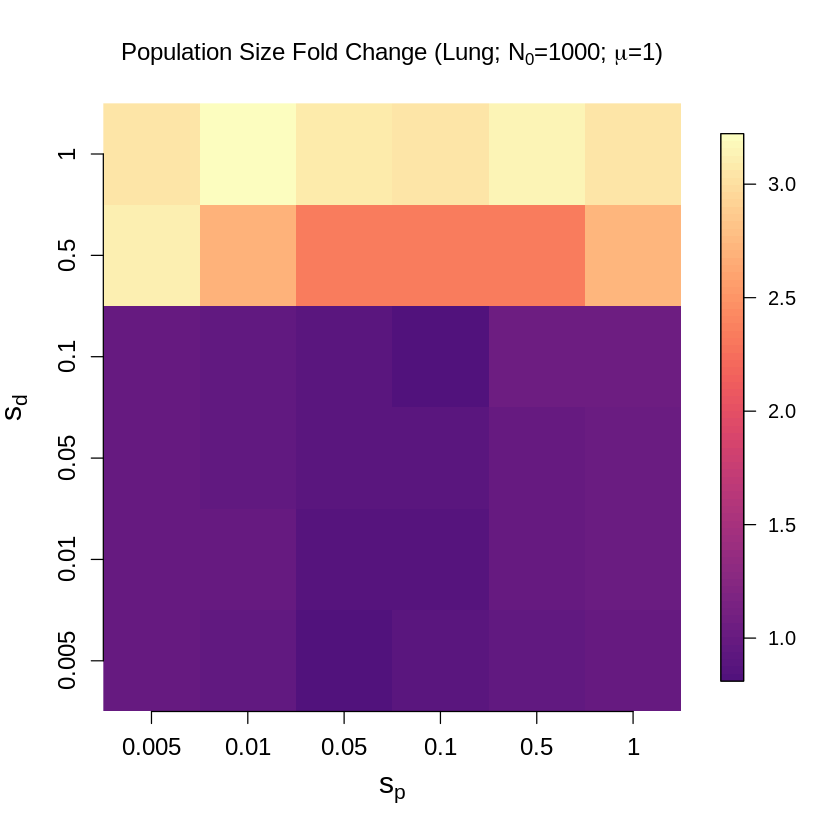

In [20]:
#--- Fold change
mu <- 1
N0 <- 1000
tmp <- Ns_fc_mean[which(N0v==N0),which(muv==mu),,]
image.plot(t(tmp),axes=F,col=cols2[(round(min(as.vector(tmp))*(length(cols2)/3.2))):(round(max(as.vector(tmp))*(length(cols2)/3.2)))])
title(main=bquote(paste('Population Size Fold Change (',.(ctype),'; ',N[0],'=',.(N0),'; ',mu,'=',.(mu),')')),xlab=bquote(s[p]),ylab=bquote(s[d]),cex.lab=1.5);
axis(1, at=seq(0,1,0.20), labels=c(5e-3,1e-2,5e-2,1e-1,5e-1,1e-0),cex.axis=1.2);  
axis(2, at=seq(0,1,0.20), labels=c(5e-3,1e-2,5e-2,1e-1,5e-1,1e-0),cex.axis=1.2);  

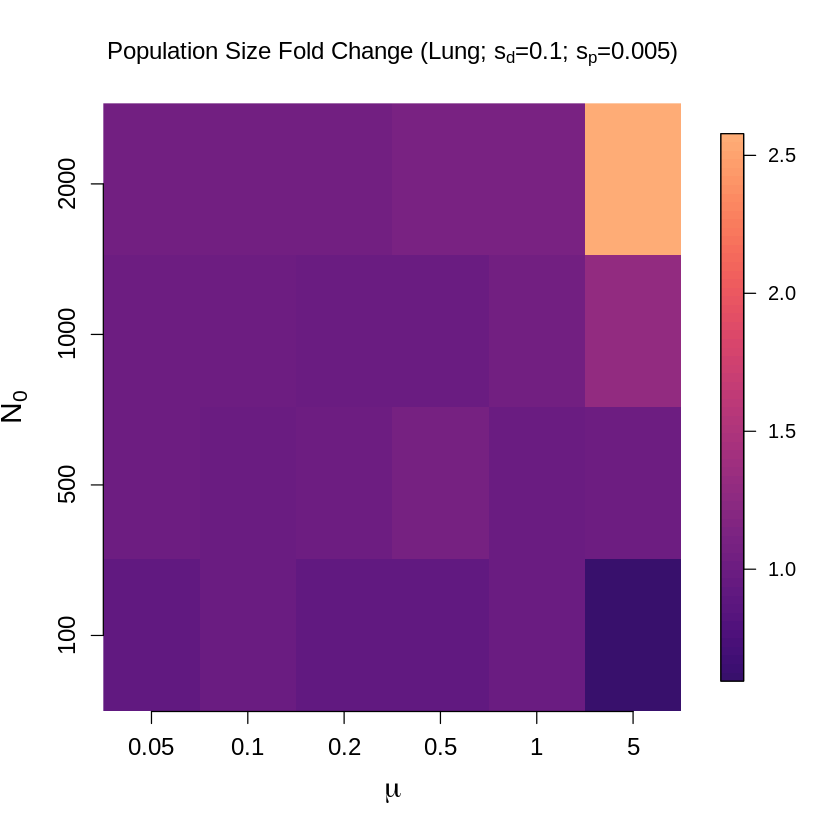

In [53]:
#--- Fold change
sd <- .1
sp <- .005
tmp <- Ns_fc_mean[,,which(sdv==sd),which(spv==sp)]
image.plot(t(tmp),axes=F,col=cols2[(round(min(as.vector(tmp))*(length(cols2)/3.1))):(round(max(as.vector(tmp))*(length(cols2)/3.1)))])
title(main=bquote(paste('Population Size Fold Change (',.(ctype),'; ',s[d],'=',.(toString(sd)),'; ',s[p],'=',.(toString(sp)),')')),xlab=expression(mu),ylab=expression(N[0]),cex.lab=1.5);
axis(1, at=seq(0,1,0.20), labels=muv,cex.axis=1.2); 
axis(2, at=seq(0,1,0.33), labels=N0v,cex.axis=1.2); 

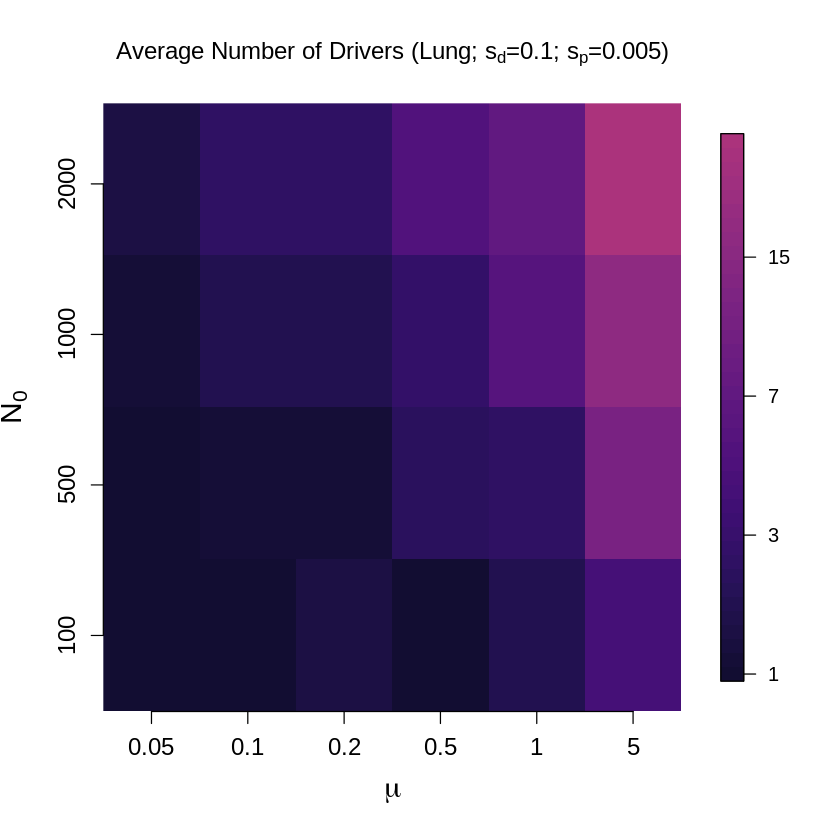

In [55]:
#--- Total drivers
sd <- .1
sp <- .005
tmp <- (apply(nd_hom,c(1,2,3,4),mean)*2)+apply(nd_het,c(1,2,3,4),mean)
tmp <- tmp[,,which(sdv==sd),which(spv==sp)]
tmp <- log(tmp+1)
ticks <- c(log(1),log(2),log(4),log(8),log(16))
image.plot(t(tmp),axes=F,col=cols2[(round(min(as.vector(tmp))*(length(cols2)/7))):(round(max(as.vector(tmp))*(length(cols2)/7)))],axis.args=list(at=ticks, labels=round(exp(ticks)-1)))
title(main=bquote(paste('Average Number of Drivers (',.(ctype),'; ',s[d],'=',.(toString(sd)),'; ',s[p],'=',.(toString(sp)),')')),xlab=expression(mu),ylab=expression(N[0]),cex.lab=1.5);
axis(1, at=seq(0,1,0.20), labels=muv,cex.axis=1.2); 
axis(2, at=seq(0,1,0.33), labels=N0v,cex.axis=1.2)

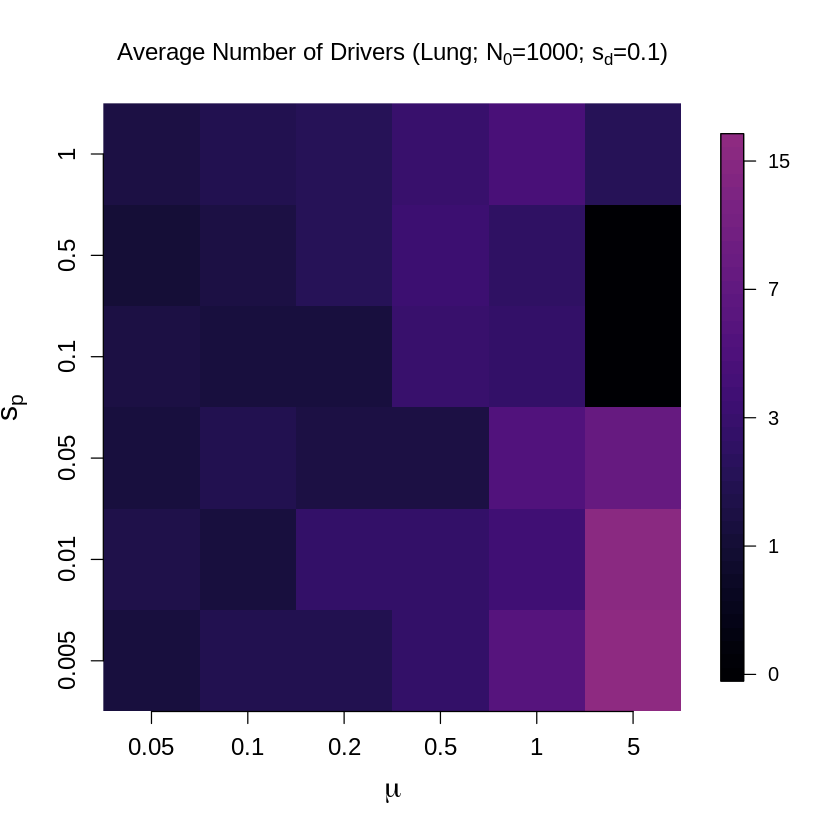

In [56]:
#--- Total drivers
N0 <- 1000
sd <- .1
tmp <- (apply(nd_hom,c(1,2,3,4),mean)*2)+apply(nd_het,c(1,2,3,4),mean)
tmp <- tmp[which(N0v==N0),,which(sdv==sd),]
tmp <- log(tmp+1)
ticks <- c(log(1),log(2),log(4),log(8),log(16))
image.plot(tmp,axes=F,col=cols2[(round(min(as.vector(tmp))*(length(cols2)/7))):(round(max(as.vector(tmp))*(length(cols2)/7)))],axis.args=list(at=ticks, labels=round(exp(ticks)-1)))
title(main=bquote(paste('Average Number of Drivers (',.(ctype),'; ',N[0],'=',.(toString(N0)),'; ',s[d],'=',.(toString(sd)),')')),xlab=expression(mu),ylab=expression(s[p]),cex.lab=1.5);
axis(2, at=seq(0,1,0.20), labels=spv,cex.axis=1.2); 
axis(1, at=seq(0,1,0.20), labels=muv,cex.axis=1.2); 

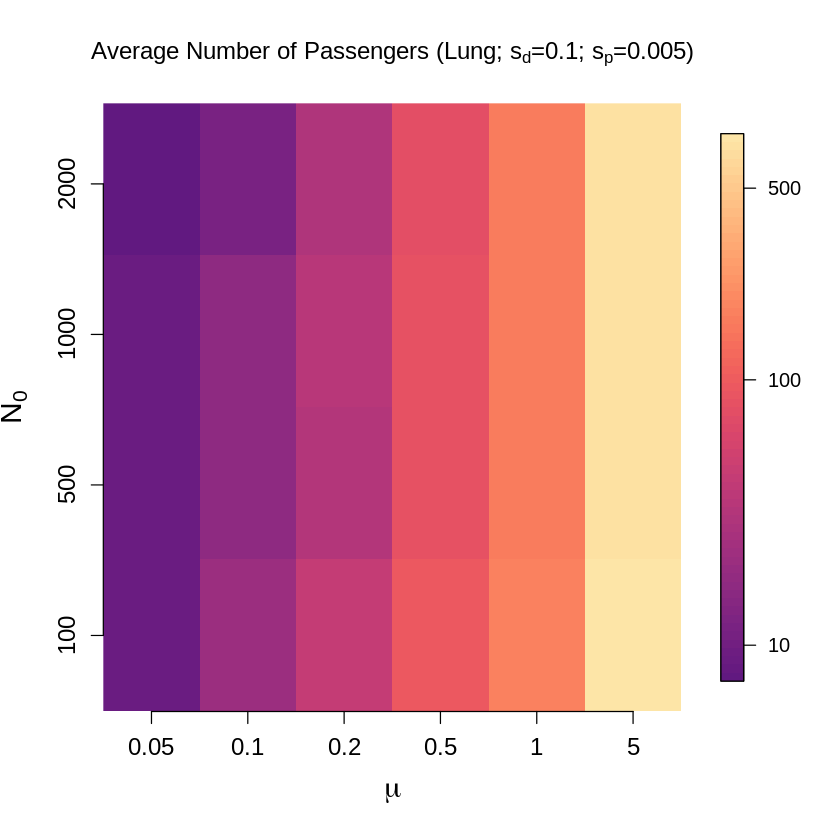

In [57]:
#--- Total passengers
sd <- .1
sp <- .005
tmp <- (apply(np_hom,c(1,2,3,4),mean)*2)+apply(np_het,c(1,2,3,4),mean)
tmp <- tmp[,,which(sdv==sd),which(spv==sp)]
tmp <- log(tmp+1)
ticks <- c(log(1),log(11),log(101),log(501))
image.plot(t(tmp),axes=F,col=cols2[(round(min(as.vector(tmp))*(length(cols2)/7))):(round(max(as.vector(tmp))*(length(cols2)/7)))],axis.args=list(at=ticks, labels=round(exp(ticks)-1)))
title(main=bquote(paste('Average Number of Passengers (',.(ctype),'; ',s[d],'=',.(sd),'; ',s[p],'=',.(sp),')')),xlab=bquote(mu),ylab=bquote(N[0]),cex.lab=1.5);
axis(1, at=seq(0,1,0.20), labels=muv,cex.axis=1.2); 
axis(2, at=seq(0,1,0.33), labels=N0v,cex.axis=1.2); 

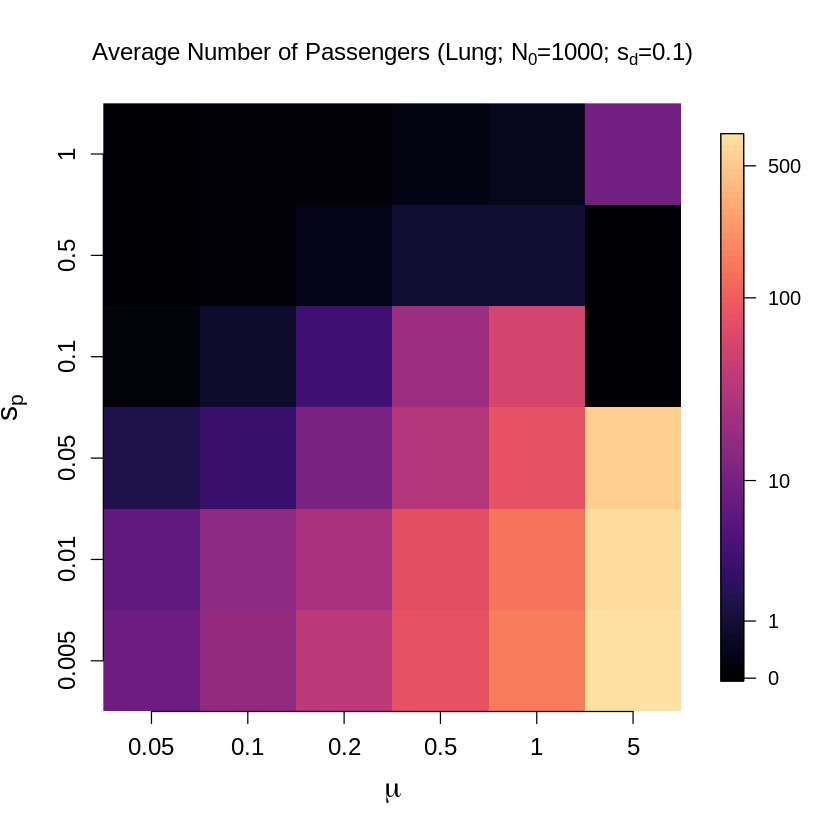

In [58]:
#--- Total passengers
N0 <- 1000
sd <- .1
tmp <- ((apply(np_hom,c(1,2,3,4),mean)*2)+apply(np_het,c(1,2,3,4),mean))
tmp <- tmp[which(N0v==N0),,which(sdv==sd),]
tmp <- log(tmp+1)
ticks<- c(0, log(2), log(11), log(101), log(501))
image.plot(tmp,axes=F,col=cols2[(round(min(as.vector(tmp))*(length(cols2)/7))):(round(max(as.vector(tmp))*(length(cols2)/7)))],axis.args=list(at=ticks, labels=round(exp(ticks)-1)))
title(main=bquote(paste('Average Number of Passengers (',.(ctype),'; ',N[0],'=',.(toString(N0)),'; ',s[d],'=',.(toString(sd)),')')),xlab=expression(mu),ylab=expression(s[p]),cex.lab=1.5);
axis(2, at=seq(0,1,0.20), labels=spv,cex.axis=1.2); 
axis(1, at=seq(0,1,0.20), labels=muv,cex.axis=1.2); 

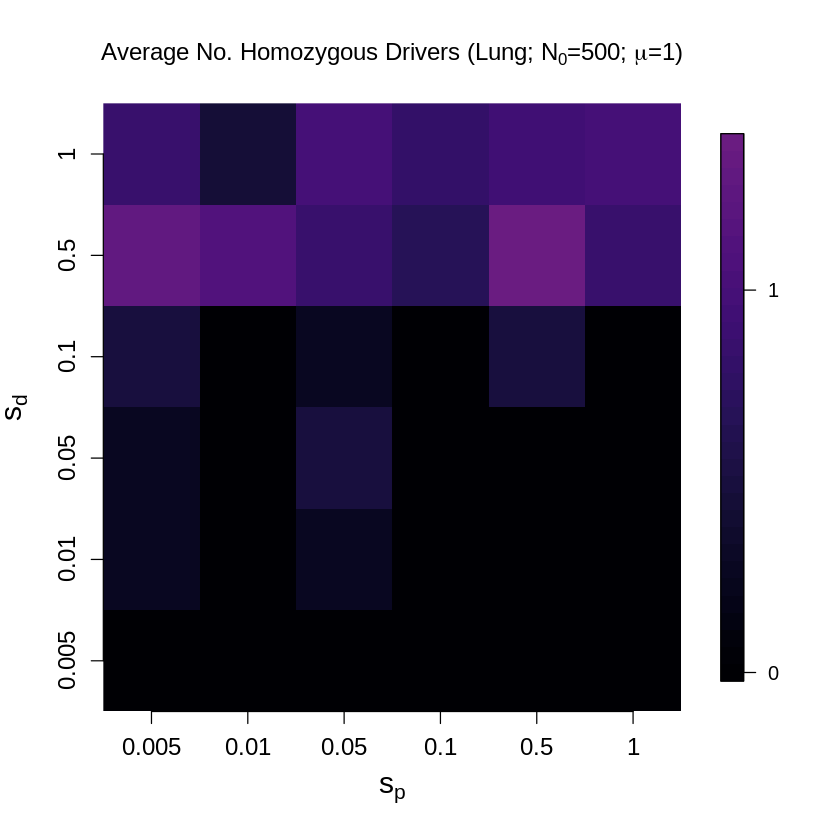

In [59]:
#--- Homoyzygous drivers
mu <- 1
N0 <- 500
tmp <- apply(nd_hom,c(1,2,3,4),mean)
tmp <- tmp[which(N0v==N0),which(muv==mu),,]
tmp <- log(tmp+1)
ticks <- c(log(1),log(2),log(3),log(4))
image.plot(t(tmp),axes=F,col=cols2[(round(min(as.vector(tmp))*(length(cols2)/3))):(round(max(as.vector(tmp))*(length(cols2)/3)))],axis.args=list(at=ticks, labels=round(exp(ticks)-1)))
title(main=bquote(paste('Average No. Homozygous Drivers (',.(ctype),'; ',N[0],'=',.(N0),'; ',mu,'=',.(mu),')')),xlab=bquote(s[p]),ylab=bquote(s[d]),cex.lab=1.5);
axis(1, at=seq(0,1,0.20), labels=c(5e-3,1e-2,5e-2,1e-1,5e-1,1e-0),cex.axis=1.2);  
axis(2, at=seq(0,1,0.20), labels=c(5e-3,1e-2,5e-2,1e-1,5e-1,1e-0),cex.axis=1.2); 

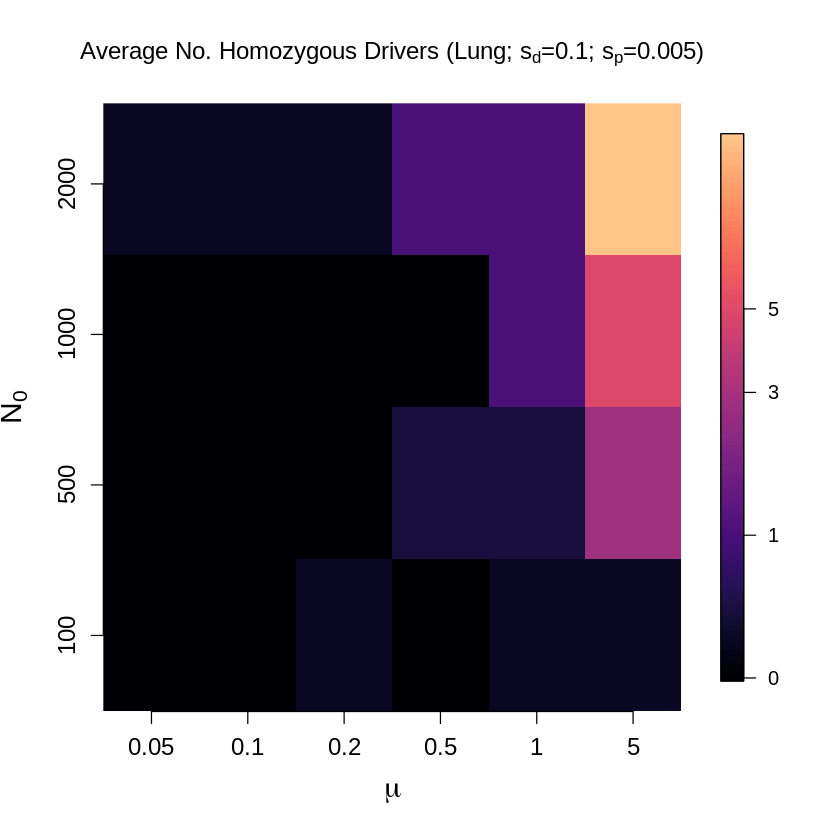

In [60]:
#--- Homozygous drivers
sd <- .1
sp <- .005
tmp <- apply(nd_hom,c(1,2,3,4),mean)
tmp <- tmp[,,which(sdv==sd),which(spv==sp)]
tmp <- log(tmp+1)
ticks <- c(log(1),log(2),log(4),log(6))
image.plot(t(tmp),axes=F,col=cols2[(round(min(as.vector(tmp))*(length(cols2)/3))):(round(max(as.vector(tmp))*(length(cols2)/3)))],axis.args=list(at=ticks, labels=round(exp(ticks)-1)))
title(main=bquote(paste('Average No. Homozygous Drivers (',.(ctype),'; ',s[d],'=',.(toString(sd)),'; ',s[p],'=',.(toString(sp)),')')),xlab=expression(mu),ylab=expression(N[0]),cex.lab=1.5);
axis(1, at=seq(0,1,0.20), labels=muv,cex.axis=1.2); 
axis(2, at=seq(0,1,0.33), labels=N0v,cex.axis=1.2)

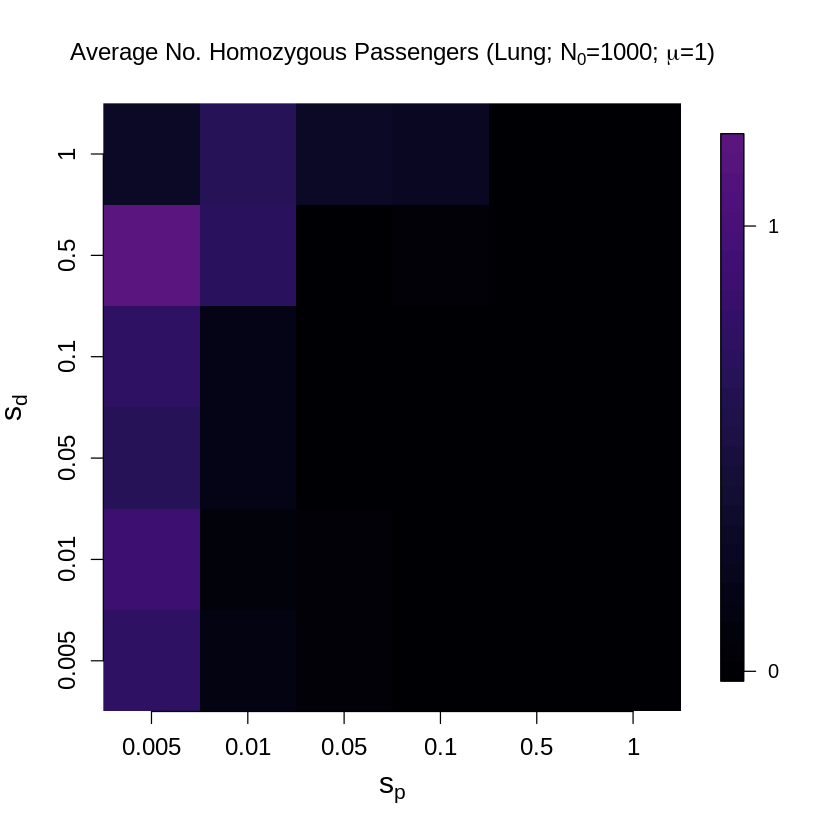

In [61]:
#--- Homozygous passengers
mu <- 1
N0 <- 1000
tmp <- apply(np_hom,c(1,2,3,4),mean)
tmp <- tmp[which(N0v==N0),which(muv==mu),,]
tmp <- log(tmp+1)
ticks <- c(log(1),log(2),log(4),log(8),log(16))
image.plot(t(tmp),axes=F,col=cols2[(round(min(as.vector(tmp))*(length(cols2)/3))):(round(max(as.vector(tmp))*(length(cols2)/3)))+1],axis.args=list(at=ticks, labels=round(exp(ticks)-1)))
title(main=bquote(paste('Average No. Homozygous Passengers (',.(ctype),'; ',N[0],'=',.(N0),'; ',mu,'=',.(mu),')')),xlab=bquote(s[p]),ylab=bquote(s[d]),cex.lab=1.5);
axis(1, at=seq(0,1,0.20), labels=sdv,cex.axis=1.2); 
axis(2, at=seq(0,1,0.20), labels=spv,cex.axis=1.2); 

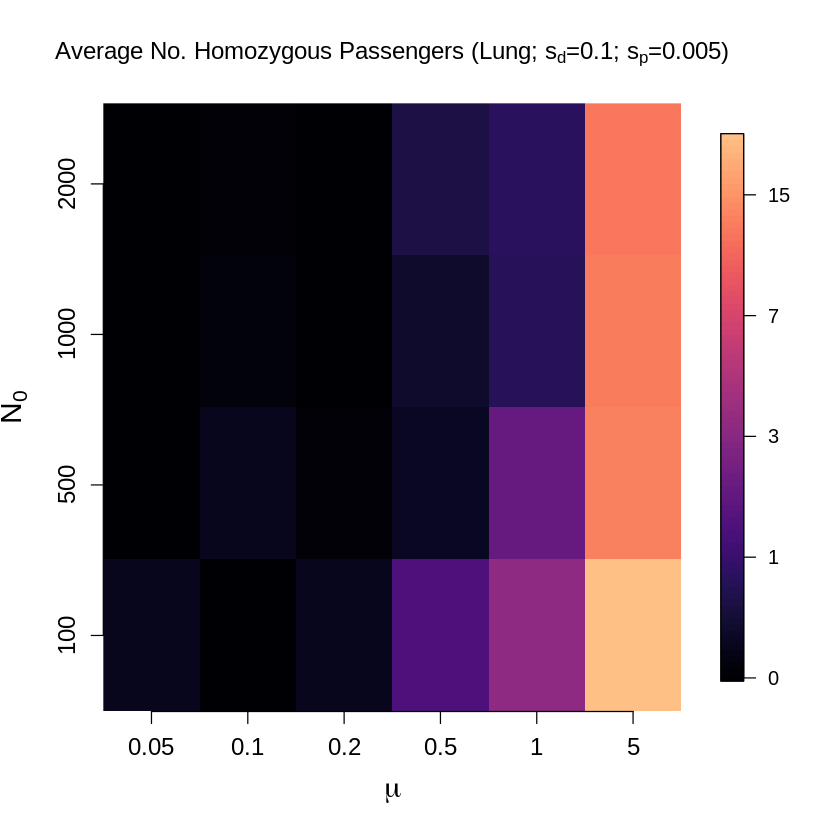

In [62]:
#--- Homozygous passengers
sd <- .1
sp <- .005
tmp <- apply(np_hom,c(1,2,3,4),mean)
tmp <- tmp[,,which(sdv==sd),which(spv==sp)]
tmp <- log(tmp+1)
ticks <- c(log(1),log(2),log(4),log(8),log(16))
image.plot(t(tmp),axes=F,col=cols2[(round(min(as.vector(tmp))*(length(cols2)/3.55))):(round(max(as.vector(tmp))*(length(cols2)/3.55)))],axis.args=list(at=ticks, labels=round(exp(ticks)-1)))
title(main=bquote(paste('Average No. Homozygous Passengers (',.(ctype),'; ',s[d],'=',.(toString(sd)),'; ',s[p],'=',.(toString(sp)),')')),xlab=expression(mu),ylab=expression(N[0]),cex.lab=1.5);
axis(1, at=seq(0,1,0.20), labels=muv,cex.axis=1.2); 
axis(2, at=seq(0,1,0.33), labels=N0v,cex.axis=1.2)